In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d bryanw26/opensea-nft-sales-2019-2021

100% 307M/307M [00:11<00:00, 26.0MB/s]
100% 307M/307M [00:11<00:00, 28.2MB/s]


In [ ]:
!unzip opensea-nft-sales-2019-2021.zip

Archive:  opensea-nft-sales-2019-2021.zip
  inflating: OpenSea_NFT_Sales_2019_2021.csv  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Process data in chunks
# chunk_size = 200000  # Adjust chunk size based on your system's memory capacity
data = pd.read_csv('/content/OpenSea_NFT_Sales_2019_2021.csv',low_memory=False)

In [ ]:
data.head()

,sales_datetime,id,asset.id,asset.name,asset.collection.name,asset.collection.short_description,asset.permalink,total_price,payment_token.name,payment_token.usd_price,asset.num_sales,seller.address,seller.user.username,winner_account.address,Category
0,2019-01-01 15:48:57,7453402,0,NaN,NaN,NaN,NaN,150000000000000000,Ether,4119.5,0,0xf8856124ea157d6f26472e38224ee6744ad13af3,Farm4Ace,0x7ebc7e83cb2b43deafa82eb0ae8b5daea3fe9a13,Uncategorized
1,2019-01-01 23:50:55,7461241,0,NaN,NaN,NaN,NaN,120000000000000000,Ether,4119.5,0,0xf29db2342a9dcb1bba4f7f2b1029bdd8ae5c0668,NaN,0x8691271d453022a447320ed82bcb2a30ba949d03,Uncategorized
2,2019-01-02 16:44:58,7471818,0,NaN,NaN,NaN,NaN,100000000000000000,Ether,4119.5,0,0x057dc43af6187a931e78a56b3293912a5b42e5ec,hagoromo,0xff60e23eb04b76c699e3d180617c3245cbcafd78,Uncategorized
3,2019-01-03 06:31:46,7485269,0,NaN,NaN,NaN,NaN,10000000000000000,Ether,4119.5,0,0x112ab3e7440b6e6b5c0fe0245579755dd78285b3,NaN,0xa58d0065cb381c80db1487e09ec803cd26a26264,Uncategorized
4,2019-01-03 10:31:43,7487454,0,NaN,NaN,NaN,NaN,249580457577544250,Ether,4119.5,0,0x889463ce0946ec870c6e9a5a42a0e85c6d1a20fd,OffTheBlockChainAxies,0x445ba6f9f553872fa9cdc14f5c0639365b39c140,Uncategorized


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5252254 entries, 0 to 5252253
Data columns (total 15 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   sales_datetime                      object 
 1   id                                  int64  
 2   asset.id                            int64  
 3   asset.name                          object 
 4   asset.collection.name               object 
 5   asset.collection.short_description  object 
 6   asset.permalink                     object 
 7   total_price                         object 
 8   payment_token.name                  object 
 9   payment_token.usd_price             float64
 10  asset.num_sales                     int64  
 11  seller.address                      object 
 12  seller.user.username                object 
 13  winner_account.address              object 
 14  Category                            object 
dtypes: float64(1), int64(3), object(11)
memory usage:

In [ ]:
print(data.isna().sum())

sales_datetime                              0
id                                          0
asset.id                                    0
asset.name                             305787
asset.collection.name                   48785
asset.collection.short_description    5200602
asset.permalink                         48783
total_price                                 0
payment_token.name                       1164
payment_token.usd_price                  3795
asset.num_sales                             0
seller.address                              0
seller.user.username                   584833
winner_account.address                      0
Category                                    0
dtype: int64


As we can see there are many missing values in few columns,so we will deal with then using different methods and techniques.

                               id  asset.id  payment_token.usd_price  \
id                       1.000000  0.801360                 0.056920   
asset.id                 0.801360  1.000000                 0.063694   
payment_token.usd_price  0.056920  0.063694                 1.000000   
asset.num_sales          0.019935  0.008834                -0.001138   

                         asset.num_sales  
id                              0.019935  
asset.id                        0.008834  
payment_token.usd_price        -0.001138  
asset.num_sales                 1.000000  


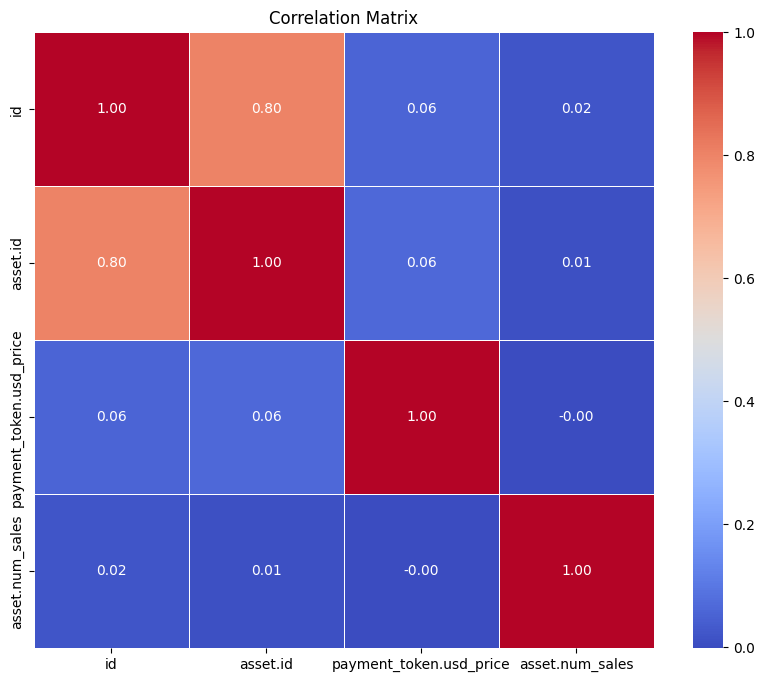

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = data.drop('asset.collection.short_description',axis = 1)

In [ ]:
print(df.isna().sum())

sales_datetime                  0
id                              0
asset.id                        0
asset.name                 305787
asset.collection.name       48785
asset.permalink             48783
total_price                     0
payment_token.name           1164
payment_token.usd_price      3795
asset.num_sales                 0
seller.address                  0
seller.user.username       584833
winner_account.address          0
Category                        0
dtype: int64


In [ ]:
# Remove rows with null values
df.dropna(inplace=True)



In [ ]:
print(df.isna().sum())


sales_datetime             0
id                         0
asset.id                   0
asset.name                 0
asset.collection.name      0
asset.permalink            0
total_price                0
payment_token.name         0
payment_token.usd_price    0
asset.num_sales            0
seller.address             0
seller.user.username       0
winner_account.address     0
Category                   0
dtype: int64


ACF

In [ ]:
unique_categories = df['payment_token.usd_price'].unique()
print(*unique_categories)

3732.31 3732.09 3689.36 3682.01 3698.85 3644.46 3761.14 3741.51 3737.17 3713.63 3699.19 3840.7 3824.22 3830.48 3793.4 3812.78 3827.27 3828.56 3732.1 3764.36 3770.34 3734.98 3750.79 3753.88 3750.28 3748.51 3762.38 3771.75 3747.69 3727.91 3718.66 3723.24 3724.16 3741.77 3750.09 3738.12 3724.41 3718.67 3800.82 3721.25 3748.58 3744.77 3749.43 3801.2 3743.61 3741.39 3736.74 3733.06 3756.18 3777.59 3817.64 3823.39 3752.03 3826.7 3779.01 3770.94 3775.15 3747.08 3833.11 3735.06 3802.82 3729.52 3820.79 3761.78 3732.0 3783.69 3815.03 3732.53 1.0 0.999726 3734.4 3741.73 3747.65 3828.0 3820.95 3809.16 3800.79 3636.28 3770.58 3697.38 3842.21 3813.86 3795.1 3828.54 3748.47 3807.79 3649.46 3718.59 3720.18 3748.03 3723.33 3765.24 3738.51 3735.68 4081.03 3958.01 3806.43 3815.21 3731.15 3724.11 3957.06 14.43 3726.05 3769.11 3733.65 0.069779 0.0098567 3827.88 4.78 4.71 3736.8 4105.14 4099.7 3800.01 3820.81 3741.2 3692.51 3658.17 3721.79 3795.36 3712.31 0.999939 3810.28 3745.99 1.78 1.54 4002.76 1.5 3931.

In [ ]:
# # Convert 'total_price' to numeric (assuming only digits)
# df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')

# Standardising the total_price column to reduce complexity




In [ ]:
df['total_price'] = df['total_price'].astype(float) / 10**18


In [ ]:
df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])

                               id  asset.id  total_price  \
id                       1.000000  0.818119     0.002418   
asset.id                 0.818119  1.000000     0.002291   
total_price              0.002418  0.002291     1.000000   
payment_token.usd_price  0.052910  0.060964    -0.045637   
asset.num_sales          0.016896  0.004764    -0.000500   

                         payment_token.usd_price  asset.num_sales  
id                                      0.052910         0.016896  
asset.id                                0.060964         0.004764  
total_price                            -0.045637        -0.000500  
payment_token.usd_price                 1.000000        -0.001090  
asset.num_sales                        -0.001090         1.000000  


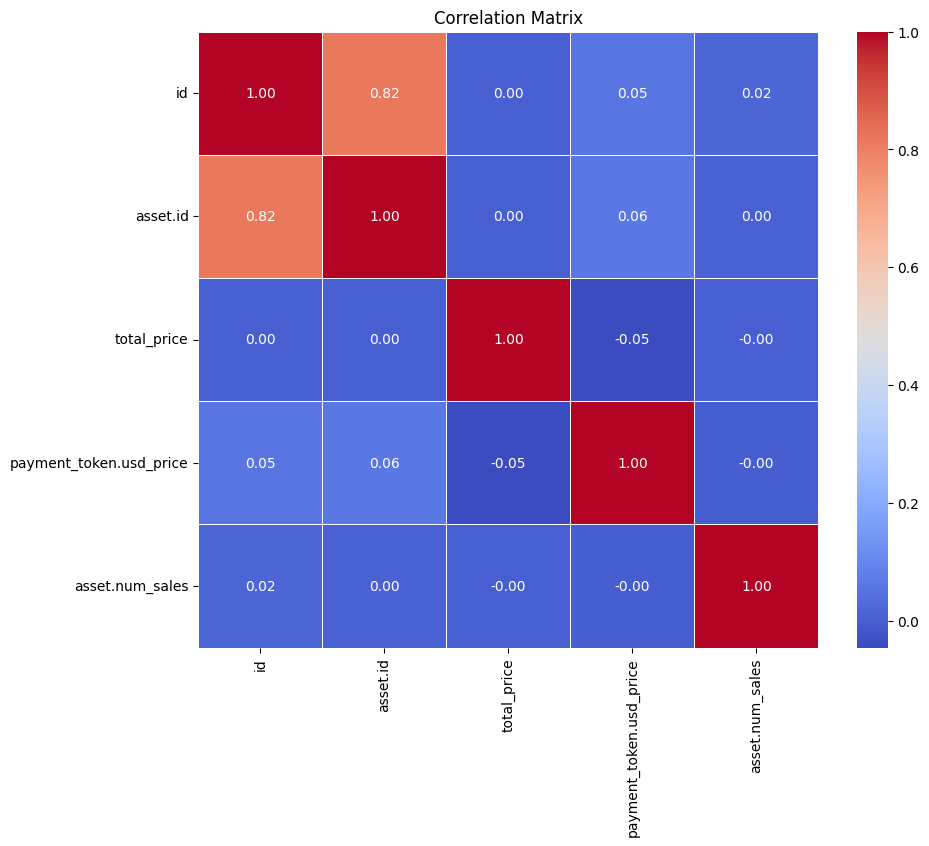

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Drop non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# def stationarity_test_chunks(df, chunksize=10000, alpha=0.05):

#     # Initialize an empty list to accumulate results
#     results = []

#     # Loop through chunks of the DataFrame
#     for i in range(0, len(df), chunksize):
#         end_index = min(i + chunksize, len(df))
#         chunk = df.iloc[i:end_index].copy()


#         # Test stationarity for each column in the chunk
#         for col in chunk.columns:
#             # Skip non-numeric columns or those that cannot be converted to float
#             if pd.api.types.is_numeric_dtype(chunk[col]):
#                 # Drop NA and non-numeric values before running the ADF test
#                 numeric_values = pd.to_numeric(chunk[col], errors='coerce').dropna()

#                 if not numeric_values.empty:
#                     # Perform ADF test on the numeric values
#                     adf_result = adfuller(numeric_values)
#                     pvalue = adf_result[1]  # Extract p-value from the result tuple

#                     # Check for stationarity based on p-value and alpha
#                     is_stationary = pvalue <= alpha  # True if p-value is less than or equal to alpha

#                     # Append results to the list
#                     results.append({
#                         'column': col,
#                         'pvalue': pvalue,
#                         'stationary': is_stationary
#                     })

#     # Create a DataFrame from the accumulated results list
#     stationarity_results = pd.DataFrame(results)

#     return stationarity_results


# # Perform stationarity test using chunks
# stationarity_df = stationarity_test_chunks(df)

# # Print the stationarity test results
# print(*stationarity_df)


# Making the total_price column stationary

In [ ]:
# Sort DataFrame by date if necessary (sorting is important for time series analysis)
df.sort_values(by='sales_datetime', inplace=True)

# Create a new DataFrame containing only 'sales_datetime' and 'total_price' columns
df1 = df[['sales_datetime', 'total_price']].copy()  # Use .copy() to avoid modifying the original DataFrame

# Convert 'sales_datetime' column to datetime format and set as DataFrame index
df1['sales_datetime'] = pd.to_datetime(df1['sales_datetime'])
df1.set_index('sales_datetime', inplace=True)


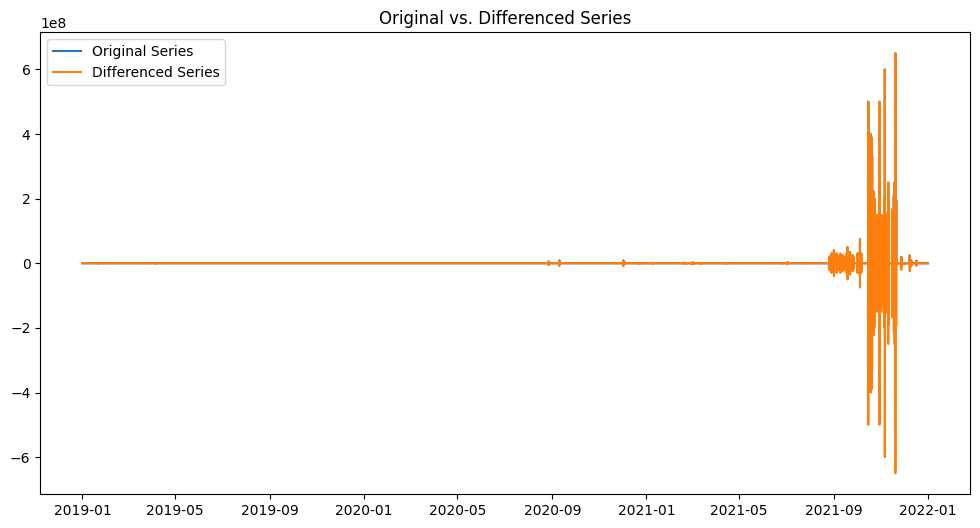

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with datetime index and 'total_price' column
# Apply first difference to the 'total_price' column
df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])
df.dropna(inplace=True)

df1['total_price_diff'] = df1['total_price'].diff()

# Drop NaN values resulting from differencing
df1.dropna(inplace=True)


# Plot original and differenced series for visualization
plt.figure(figsize=(12, 6))
plt.plot(df1['total_price'], label='Original Series')
plt.plot(df1['total_price_diff'], label='Differenced Series')
plt.title('Original vs. Differenced Series')
plt.legend()
plt.show()



In [ ]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# def stationarity_test_chunks(df1, chunksize=20000, alpha=0.05):

#     # Initialize an empty list to accumulate results
#     results = []

#     # Loop through chunks of the DataFrame
#     for i in range(0, len(df1), chunksize):
#         end_index = min(i + chunksize, len(df1))
#         chunk = df1.iloc[i:end_index].copy()

#         # Test stationarity for the 'total_price' column only
#         col = 'total_price_diff'
#         if pd.api.types.is_numeric_dtype(chunk[col]):
#             # Drop NA and non-numeric values before running the ADF test
#             numeric_values = pd.to_numeric(chunk[col], errors='coerce').dropna()

#             if not numeric_values.empty:
#                 # Perform ADF test on the numeric values
#                 adf_result = adfuller(numeric_values)
#                 pvalue = adf_result[1]  # Extract p-value from the result tuple

#                 # Check for stationarity based on p-value and alpha
#                 is_stationary = pvalue <= alpha  # True if p-value is less than or equal to alpha

#                 # Append results to the list, focusing on 'total_price'
#                 results.append({
#                     'column': col,
#                     'pvalue': pvalue,
#                     'stationary': is_stationary
#                 })

#     # Create a DataFrame from the accumulated results list
#     stationarity_results = pd.DataFrame(results)

#     return stationarity_results


# # Perform stationarity test using chunks (assuming 'df' is loaded)
# stationarity_df = stationarity_test_chunks(df1)

# # Print the stationarity test results for 'total_price' only
# total_price_results = stationarity_df[stationarity_df['column'] == 'total_price_diff']
# print(total_price_results)


<ipython-input-18-37a12b181546>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[column_name] = pd.to_numeric(chunk[column_name], errors='coerce')
<ipython-input-18-37a12b181546>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[column_name] = pd.to_numeric(chunk[column_name], errors='coerce')
<ipython-input-18-37a12b181546>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

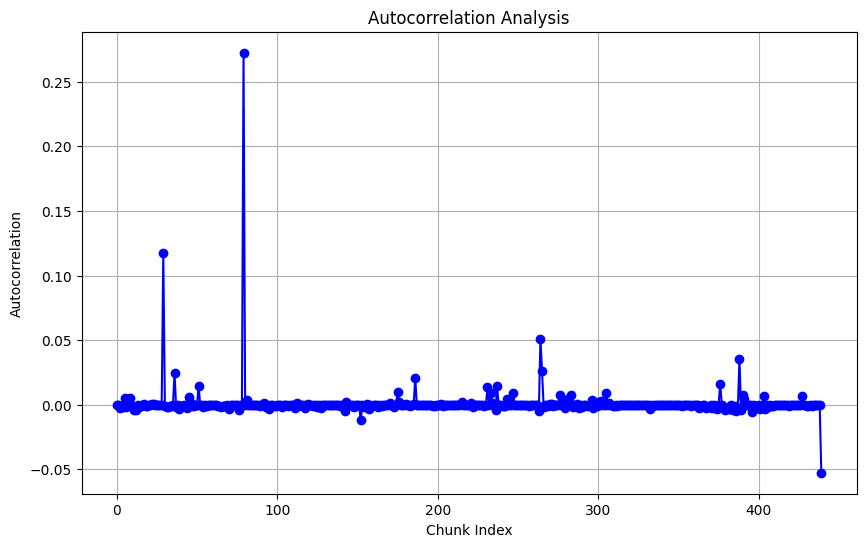

Mean Autocorrelation: 0.0009
Median Autocorrelation: -0.0003
Autocorrelation Variance: 0.0002


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation_analysis_chunks(df1, column_name, lag=50, chunksize=10000):
    autocorr_results = []

    # Iterate over the DataFrame in chunks
    for i in range(0, len(df1), chunksize):
        end_index = min(i + chunksize, len(df1))
        chunk = df1.iloc[i:end_index]

        # Convert column to numeric if necessary
        chunk[column_name] = pd.to_numeric(chunk[column_name], errors='coerce')

        # Drop NaN values
        chunk = chunk.dropna(subset=[column_name])

        # Calculate autocorrelation for the chunk
        autocorr_chunk = chunk[column_name].autocorr(lag=lag)
        autocorr_results.append(autocorr_chunk)

    return autocorr_results

# Assuming df is your DataFrame with sales_datetime and total_price columns
# Perform autocorrelation analysis on 'total_price' in chunks
autocorr_results = autocorrelation_analysis_chunks(df, 'total_price', lag=50, chunksize=10000)

# Plot autocorrelation results
plt.figure(figsize=(10, 6))
plt.plot(autocorr_results, marker='o', linestyle='-', color='b')
plt.title('Autocorrelation Analysis')
plt.xlabel('Chunk Index')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Evaluate autocorrelation results (e.g., mean, median, variance)
autocorr_mean = np.mean(autocorr_results)
autocorr_median = np.median(autocorr_results)
autocorr_variance = np.var(autocorr_results)

print(f"Mean Autocorrelation: {autocorr_mean:.4f}")
print(f"Median Autocorrelation: {autocorr_median:.4f}")
print(f"Autocorrelation Variance: {autocorr_variance:.4f}")


In [ ]:
df1.info()

# # Optionally, set 'sales_datetime' as the DataFrame index for time series analysis
# df1.set_index('sales_datetime', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4390303 entries, 2019-01-01 00:46:24 to 2022-01-01 00:00:07
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_price       float64
 1   total_price_diff  float64
dtypes: float64(2)
memory usage: 100.5 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4390303 entries, 2019-01-01 00:46:24 to 2022-01-01 00:00:07
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_price       float64
 1   total_price_diff  float64
dtypes: float64(2)
memory usage: 100.5 MB


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4390304 entries, 3055815 to 4723750
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   sales_datetime           datetime64[ns]
 1   id                       int64         
 2   asset.id                 int64         
 3   asset.name               object        
 4   asset.collection.name    object        
 5   asset.permalink          object        
 6   total_price              float64       
 7   payment_token.name       object        
 8   payment_token.usd_price  float64       
 9   asset.num_sales          int64         
 10  seller.address           object        
 11  seller.user.username     object        
 12  winner_account.address   object        
 13  Category                 object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 502.4+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4390303 entries, 2019-01-01 00:46:24 to 2022-01-01 00:00:07
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_price       float64
 1   total_price_diff  float64
dtypes: float64(2)
memory usage: 100.5 MB


In [ ]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

# Now attempt concatenation again
df2 = pd.concat([df['sales_datetime'], df1['total_price_diff']], axis=1)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4390304 entries, 0 to 4390303
Data columns (total 2 columns):
 #   Column            Dtype         
---  ------            -----         
 0   sales_datetime    datetime64[ns]
 1   total_price_diff  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.0 MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4390304 entries, 0 to 4390303
Data columns (total 2 columns):
 #   Column            Dtype         
---  ------            -----         
 0   sales_datetime    datetime64[ns]
 1   total_price_diff  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.0 MB


In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame with 'sales_datetime' column
df2['sales_datetime'] = pd.to_datetime(df2['sales_datetime'])
df2.set_index('sales_datetime', inplace=True)


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4390304 entries, 2019-01-01 00:18:13 to 2022-01-01 00:00:07
Data columns (total 1 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_price_diff  float64
dtypes: float64(1)
memory usage: 67.0 MB


In [ ]:
df2.isna().sum()


total_price_diff    1
dtype: int64

In [ ]:
df2.dropna()

,total_price_diff
sales_datetime,
2019-01-01 00:18:13,-1.9100
2019-01-01 00:46:24,-0.0100
2019-01-01 01:02:59,0.0000
2019-01-01 01:03:03,0.0000
2019-01-01 01:06:22,0.0000
...,...
2021-12-31 23:59:59,-0.3201
2021-12-31 23:59:59,0.6101
2021-12-31 23:59:59,-0.7751


In [ ]:
# Calculate autocorrelation manually using NumPy
from numpy import corrcoef

# Extract 'event_total_price' series
total_price_series = df['total_price_diff']

# Calculate autocorrelation for lag 1 to 20
max_lag = 20
autocorrelation_values = []
for lag in range(1, max_lag + 1):
    autocorrelation = total_price_series.autocorr(lag=lag)
    autocorrelation_values.append(autocorrelation)

# Display autocorrelation values
print(f"Autocorrelation values (Lag 1 to {max_lag}):")
for lag, ac in enumerate(autocorrelation_values, start=1):
    print(f"Lag {lag}: {ac:.4f}")


In [ ]:
df2.isna().sum()

total_price_diff    1
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error

def fit_arima_chunks(series, order=(1, 0, 0), chunksize=1000):

    model_results = []

    # Loop through the series in chunks
    for i in range(0, len(series), chunksize):
        end_index = min(i + chunksize, len(series))
        chunk = series.iloc[i:end_index]

        # Drop NaN values from the current chunk
        chunk = chunk.dropna()

        # Fit ARIMA model to the current chunk
        try:
            model = ARIMA(chunk, order=order)
            model_result = model.fit()

            # Append the model result to the list
            model_results.append(model_result)
        except Exception as e:
            print(f"Error fitting ARIMA model for chunk {i}-{end_index}: {e}")

    return model_results




In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def evaluate_arima_model(model_results, actual_values):
    # Combine forecasts from all model results
    forecasts = np.concatenate([result.forecast(len(result.fittedvalues)) for result in model_results])

    # Evaluate R-squared
    r_squared = r2_score(actual_values, forecasts)

    # Evaluate RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, forecasts))

    return r_squared, rmse

def fit_arima_chunks(data, order=(1, 0, 0), chunksize=10000):
    # Initialize an empty list to store ARIMA model results
    arima_results = []

    # Iterate over the data in chunks
    for i in range(0, len(data), chunksize):
        chunk = data.iloc[i:i+chunksize].copy()

        try:
            # Fit ARIMA model to the current chunk
            arima_model = ARIMA(chunk, order=order)
            arima_result = arima_model.fit()
            arima_results.append(arima_result)
        except Exception as e:
            print(f"Error fitting ARIMA model on chunk {i}-{i+chunksize}: {e}")

    return arima_results

# Assuming df2 is your DataFrame with 'total_price_diff' column and 'sales_datetime' index
total_price_diff = df2['total_price_diff']

# Handle NaN values (drop or fill with mean/median)
total_price_diff_clean = total_price_diff.dropna()  # Example: Drop NaN values

# Fit ARIMA model to the 'total_price_diff' series in chunks
try:
    arima_results = fit_arima_chunks(total_price_diff_clean, order=(1, 0, 0), chunksize=1000)
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")
else:
    # Evaluate ARIMA model
    if arima_results:
        r_squared, rmse = evaluate_arima_model(arima_results, total_price_diff_clean)
        print(f"R-squared: {r_squared:.4f}")
        print(f"RMSE: {rmse:.4f}")
    else:
        print("No ARIMA models fitted.")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/li

R-squared: -0.0000
RMSE: 1341342.3309


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_chunks(series, order=(1, 0, 0), chunksize=1000):

    model_results = []

    # Loop through the series in chunks
    for i in range(0, len(series), chunksize):
        end_index = min(i + chunksize, len(series))
        chunk = series.iloc[i:end_index]

        # Fit ARIMA model to the current chunk
        try:
            model = ARIMA(chunk, order=order)
            model_result = model.fit()

            # Append the model result to the list
            model_results.append(model_result)
        except Exception as e:
            print(f"Error fitting ARIMA model for chunk {i}-{end_index}: {e}")

    return model_results


# Set the frequency of the datetime index to 'D' (daily)
df1.index = df1.index.asfreq('D')

# Fit ARIMA model to the 'total_price_diff' series in chunks
try:
    arima_results = fit_arima_chunks(df1['total_price_diff'], order=(1, 0, 0), chunksize=1000)
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")
else:
    # Print summary of the first ARIMA model result
    if arima_results:
        print(arima_results[0].summary())
    else:
        print("No ARIMA models fitted.")


AttributeError: 'DatetimeIndex' object has no attribute 'asfreq'

In [ ]:
# Assuming df1 is your DataFrame with datetime index
df1.index.freq = 'D'  # Set the frequency of the datetime index to 'D' (daily)


ValueError: Inferred frequency None from passed values does not conform to passed frequency D

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

def arima_with_chunking(df1, chunksize=100000, order=(1, 0, 1)):
    predictions = []

    # Loop through chunks of the DataFrame
    for i in range(0, len(df1), chunksize):
        end_index = min(i + chunksize, len(df1))
        chunk = df1.iloc[i:end_index]

        # Fit ARIMA model on the chunk
        model = ARIMA(chunk['total_price_diff'], order=order, dates=chunk.index)
        fitted_model = model.fit()

        # Make predictions for the next chunk (out-of-sample forecast)
        if i + chunksize < len(df1):
            next_chunk = df1.iloc[end_index:end_index + chunksize]
            forecast_index = pd.date_range(start=chunk.index[-1], periods=len(next_chunk), freq='D')
            forecast = fitted_model.forecast(steps=len(next_chunk), index=forecast_index)
            predictions.extend(forecast)

    return predictions

# Specify ARIMA order (p, d, q) and chunk size
arima_order = (1, 0, 1)
chunk_size = 100000

# Perform ARIMA modeling with chunking
predicted_values = arima_with_chunking(df1, chunksize=chunk_size, order=arima_order)


KeyError: 'total_price_diff'

In [ ]:
df.info()

In [ ]:
import pandas as pd

# Assuming 'df' contains the actual 'total_price' values

# Calculate the number of chunks used for prediction
num_chunks = len(predicted_values) // chunk_size  # Integer division

# Extract actual values for evaluation (assuming predictions cover next chunks)
if num_chunks > 0:
    actual_values = df['total_price_diff'].iloc[chunk_size * num_chunks:].values
else:
    print("Not enough data for evaluation (no actual values).")
    actual_values = None  # Set actual_values to None for clarity

# Calculate evaluation metrics (if actual values are available)
if actual_values is not None:
    # R-squared
    r_squared = 1 - np.sum((actual_values - predicted_values) ** 2) / np.sum((actual_values - actual_values.mean()) ** 2)

    # Mean Squared Error (MSE)
    mse = np.mean((actual_values - predicted_values) ** 2)

    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(actual_values - predicted_values))

    # Print evaluation metrics
    print("R-squared:", r_squared)
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
else:
    print("Evaluation not possible (no actual values).")


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Drop rows with NaN values
# numeric_data_no_nan = numeric_data.dropna()

# # Calculate VIF for non-NaN rows
# vif_data = pd.DataFrame()
# vif_data["feature"] = numeric_data_no_nan.columns
# vif_data["VIF"] = [variance_inflation_factor(numeric_data_no_nan.values, i) for i in range(len(numeric_data_no_nan.columns))]

# # Print VIF
# print(vif_data)



column pvalue stationary


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Univariate Outlier Detection
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=numeric_data)
# plt.title('Univariate Outlier Detection')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# from sklearn.impute import SimpleImputer

# # Impute missing values for categorical columns with mode and numerical columns with median
# imputer_cat = SimpleImputer(strategy='most_frequent')
# imputer_num = SimpleImputer(strategy='median')

# # List of columns to impute
# cols_to_impute_cat = ['asset.name', 'asset.collection.name', 'payment_token.name']
# cols_to_impute_num = ['payment_token.usd_price']


# # Impute categorical columns
# data[cols_to_impute_cat] = imputer_cat.fit_transform(data[cols_to_impute_cat])

# # Impute numerical columns
# data[cols_to_impute_num] = imputer_num.fit_transform(data[cols_to_impute_num])
# data = data.drop('asset.collection.short_description',axis = 1)

# # For 'seller.user.username', we might not impute since it could indicate anonymous sellers

# # Check if there are any remaining missing values
# print(data.isna().sum())

sales_datetime                  0
id                              0
asset.id                        0
asset.name                      0
asset.collection.name           0
asset.permalink             48783
total_price                     0
payment_token.name              0
payment_token.usd_price         0
asset.num_sales                 0
seller.address                  0
seller.user.username       584833
winner_account.address          0
Category                        0
dtype: int64


## After Imputation


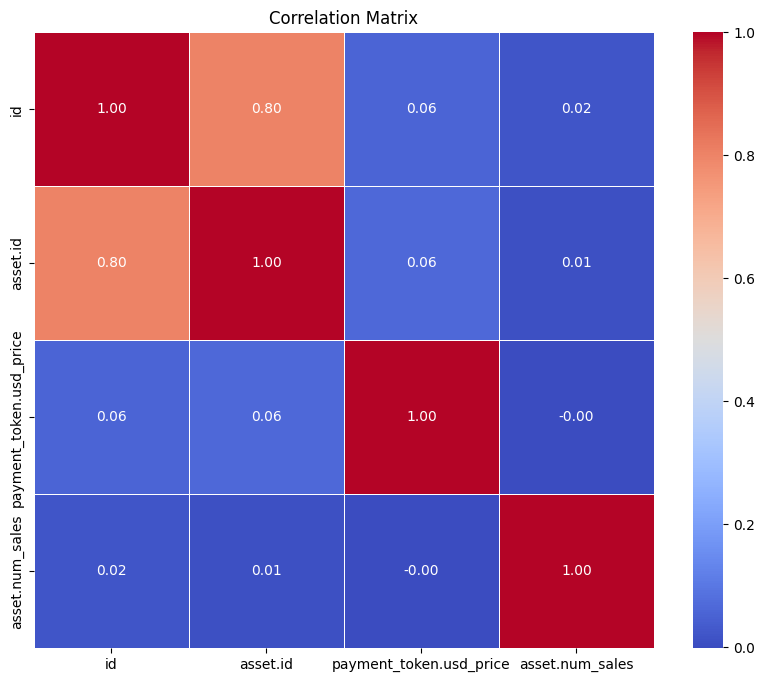

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt



# # Drop non-numeric columns
# numeric_data = data.select_dtypes(include=['float64', 'int64'])

# # Plot correlation matrix
# corr_matrix = numeric_data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Drop rows with NaN values
# numeric_data_no_nan = numeric_data.dropna()

# # Calculate VIF for non-NaN rows
# vif_data = pd.DataFrame()
# vif_data["feature"] = numeric_data_no_nan.columns
# vif_data["VIF"] = [variance_inflation_factor(numeric_data_no_nan.values, i) for i in range(len(numeric_data_no_nan.columns))]

# # Print VIF
# print(vif_data)

                   feature        VIF
0                       id  10.123476
1                 asset.id   2.794712
2  payment_token.usd_price   0.031081
3          asset.num_sales   1.000430


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Univariate Outlier Detection
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=numeric_data)
# plt.title('Univariate Outlier Detection')
# plt.xticks(rotation=45)
# plt.show()


In [ ]:
# # Identify outliers
# outliers = numeric_data[mahalanobis_dist > threshold]

# # Print number of outliers
# print("Number of Multivariate Outliers:", len(outliers))


In [ ]:
# from sklearn.covariance import MinCovDet

# # Fit Minimum Covariance Determinant (MCD)
# mcd = MinCovDet()
# mcd.fit(numeric_data)

# # Calculate Mahalanobis Distance
# mahalanobis_dist = mcd.mahalanobis(numeric_data)

# # Set the threshold for outlier detection (e.g., 95th percentile)
# threshold = mahalanobis_dist.quantile(0.95)

# # Identify outliers
# outliers = numeric_data[mahalanobis_dist > threshold]

# print("Multivariate Outliers:")
# print(outliers)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5252254 entries, 0 to 5252253
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sales_datetime           object 
 1   id                       int64  
 2   asset.id                 int64  
 3   asset.name               object 
 4   asset.collection.name    object 
 5   asset.permalink          object 
 6   total_price              object 
 7   payment_token.name       object 
 8   payment_token.usd_price  float64
 9   asset.num_sales          int64  
 10  seller.address           object 
 11  seller.user.username     object 
 12  winner_account.address   object 
 13  Category                 object 
dtypes: float64(1), int64(3), object(10)
memory usage: 561.0+ MB


In [ ]:
print(data.isna().sum())

sales_datetime                  0
id                              0
asset.id                        0
asset.name                      0
asset.collection.name           0
asset.permalink             48783
total_price                     0
payment_token.name              0
payment_token.usd_price         0
asset.num_sales                 0
seller.address                  0
seller.user.username       584833
winner_account.address          0
Category                        0
dtype: int64


## STATIONARY TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')  # Run the ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis - Data is stationary")
    else:
        print("Fail to reject the null hypothesis - Data is non-stationary")

In [ ]:
for chunk in data:
    # Process each chunk (e.g., convert data types, perform operations)
    chunk['sales_datetime'] = pd.to_datetime(chunk['sales_datetime'])
    chunk['total_price'] = pd.to_numeric(chunk['total_price'], errors='coerce')
    # Perform ADF test on 'total_price' column
    adf_test(chunk['total_price'])

ADF Statistic: -447.21081261063745
p-value: 0.0
Critical Values:
   1%: -3.430382697083147
   5%: -2.861554451678114
   10%: -2.566777692108686
Reject the null hypothesis - Data is stationary
ADF Statistic: -30.355648169168152
p-value: 0.0
Critical Values:
   1%: -3.4303827103310676
   5%: -2.8615544575334875
   10%: -2.566777695225296
Reject the null hypothesis - Data is stationary
ADF Statistic: -26.82007778399192
p-value: 0.0
Critical Values:
   1%: -3.4303827100038293
   5%: -2.861554457388853
   10%: -2.5667776951483123
Reject the null hypothesis - Data is stationary
ADF Statistic: -41.16615429028958
p-value: 0.0
Critical Values:
   1%: -3.4303827103310676
   5%: -2.8615544575334875
   10%: -2.566777695225296
Reject the null hypothesis - Data is stationary


KeyboardInterrupt: 

## MODELLING

In [ ]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# def stationarity_test_chunks(df, chunksize=10000, alpha=0.05):

#     # Create an empty DataFrame to store test results
#     stationarity_results = pd.DataFrame(columns=['column', 'pvalue', 'stationary'])

#     # Loop through chunks of the DataFrame
#     for i in range(0, len(df), chunksize):
#         chunk = df.iloc[i:i+chunksize]

#         # Convert 'sales_datetime' to datetime (assuming it's a string column)
#         try:
#             chunk['sales_datetime'] = pd.to_datetime(chunk['sales_datetime'])  # Avoid in-place modification
#         except (KeyError, ValueError):  # Handle cases where 'sales_datetime' might not exist or be invalid
#             print(f"Warning: 'sales_datetime' column not found or conversion failed in chunk {i}")
#             continue  # Skip this chunk if conversion fails

#         # Test stationarity for each column in the chunk
#         for col in chunk.columns:
#             # Perform ADF test on the column
#             adf_result = adfuller(chunk[col])
#             pvalue = adfuller_result[0]  # Extract p-value from the result tuple

#             # Check for stationarity based on p-value and alpha
#             is_stationary = pvalue > alpha

#             # Append results to the DataFrame (using .loc for clarity)
#             stationarity_results = stationarity_results.append({
#                 'column': col,
#                 'pvalue': pvalue,
#                 'stationary': is_stationary
#             }, ignore_index=True)

#     return stationarity_results

# # Perform stationarity test using chunks (assuming your DataFrame is named 'df')
# stationarity_df = stationarity_test_chunks(df)

# # Print the stationarity test results
# print(stationarity_df)


<ipython-input-19-388ddcb5ed12>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sales_datetime'] = pd.to_datetime(chunk['sales_datetime'])  # Avoid in-place modification


NameError: name 'adfuller_result' is not defined

In [ ]:
# # Initialize an empty dictionary to store ADF test results for each column
# adf_results = {}

# # Iterate over each chunk of the data
# for chunk in df:
#     # Process each chunk (e.g., convert data types, handle missing values)
#     chunk['sales_datetime'] = pd.to_datetime(chunk['sales_datetime'])
#     chunk['total_price'] = pd.to_numeric(chunk['total_price'], errors='coerce')
#     chunk.dropna(subset=['total_price'], inplace=True)  # Drop rows with missing values for 'total_price'

#     # Iterate over each column (variable) in the chunk (excluding non-numeric columns)
#     for column in chunk.select_dtypes(include=[np.number]).columns:
#         # Perform ADF test on the column
#         result = adfuller(chunk[column], autolag='AIC')  # Run the ADF test
#         adf_results[column] = {
#             'ADF Statistic': result[0],
#             'p-value': result[1],
#             'Critical Values': result[4],
#             'Stationary': result[1] <= 0.05  # True if p-value <= 0.05 (reject null hypothesis)
#         }


MissingDataError: exog contains inf or nans

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# data['sales_datetime'] = pd.to_datetime(data['sales_datetime'])
# data.set_index('sales_datetime', inplace=True)

In [ ]:
# # Exploratory Data Analysis
# plt.figure(figsize=(10, 6))
# plt.plot(data.index, data['total_price'])
# plt.title('Total Price over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Price')
# plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file path and chunk size
file_path = '/content/OpenSea_NFT_Sales_2019_2021.csv'
chunk_size = 100000  # Adjust the chunk size based on your system's memory capacity

# Create an iterator to read the CSV file in chunks
data_iterator = pd.read_csv(file_path, chunksize=chunk_size,low_memory = False)


In [ ]:
# Initialize empty lists to store results
predictions_list = []
actual_values_list = []

# Iterate over each chunk of the data
for chunk in data_iterator:
    # Convert 'sales_datetime' to datetime format
    chunk['sales_datetime'] = pd.to_datetime(chunk['sales_datetime'])

    # Convert 'total_price' to numeric format
    chunk['total_price'] = pd.to_numeric(chunk['total_price'], errors='coerce')

    # Drop rows with missing 'total_price'
    chunk.dropna(subset=['total_price'], inplace=True)

    # Check if chunk is not empty
    if not chunk.empty:
        # Fit ARIMA model on the chunk
        order = (1, 1, 1)  # ARIMA parameters (p, d, q)
        model_arima = ARIMA(chunk['total_price'], order=order)
        model_arima_fit = model_arima.fit()

        # Generate predictions for the chunk
        predictions = model_arima_fit.predict(start=0, end=len(chunk)-1, typ='levels')

        # Append predictions to results list
        predictions_list.append(predictions)

        # Extract actual values corresponding to the predictions
        actual_values_list.append(chunk['total_price'])

# Concatenate predictions and actual values from all chunks into single series/dataframe
all_predictions = pd.concat(predictions_list)
actual_values = pd.concat(actual_values_list)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, all_predictions)
rmse = np.sqrt(mean_squared_error(actual_values, all_predictions))
mape = np.mean(np.abs((actual_values - all_predictions) / actual_values)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

from sklearn.metrics import r2_score

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(actual_values, all_predictions)

print(f"R-squared (R^2) Score: {r_squared:.4f}")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, all_predictions)
rmse = np.sqrt(mean_squared_error(actual_values, all_predictions))
mape = np.mean(np.abs((actual_values - all_predictions) / actual_values)) * 100
r_squared = r2_score(actual_values, all_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R^2) Score: {r_squared:.4f}")

1


Mean Absolute Error (MAE): 9.806560057208087e+21
Root Mean Squared Error (RMSE): 2.0960870004713168e+24
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R^2) Score: 0.0044
Mean Absolute Error (MAE): 9.806560057208087e+21
Root Mean Squared Error (RMSE): 2.0960870004713168e+24
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R^2) Score: 0.0044


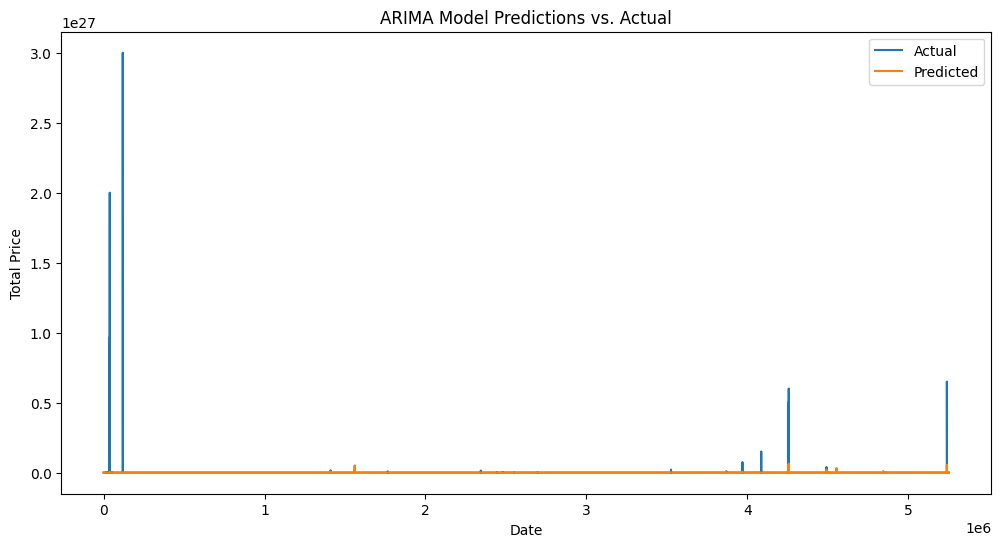

In [ ]:
# Plot actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, actual_values.values, label='Actual')
plt.plot(all_predictions.index, all_predictions.values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('ARIMA Model Predictions vs. Actual')
plt.legend()
plt.show()

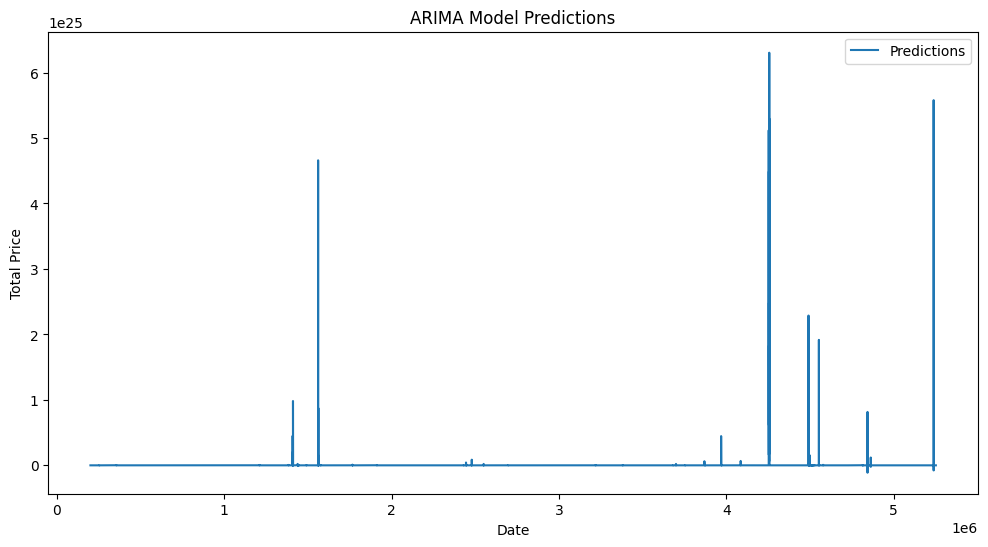

In [ ]:
# Concatenate predictions from all chunks into a single series
all_predictions = pd.concat(results)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(all_predictions.index, all_predictions.values, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# df = pd.read_csv('/content/OpenSea_NFT_Sales_2019_2021.csv',low_memory=False)

# df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])
# df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')


# # Calculate evaluation metrics
# actual_values = df['total_price']  # Actual total prices from the entire dataset
# predicted_values = all_predictions  # Predicted total prices from the ARIMA model

# # Compute Mean Absolute Error (MAE)
# mae = mean_absolute_error(actual_values, predicted_values)

# # Compute Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# # Compute Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


ValueError: Found input variables with inconsistent numbers of samples: [5252254, 5052254]

In [ ]:
# # Plot actual data and predictions
# plt.figure(figsize=(12, 6))
# plt.plot(actual_values.index, actual_values.values, label='Actual')
# plt.plot(predicted_values.index, predicted_values.values, label='Predicted')
# plt.xlabel('Date')
# plt.ylabel('Total Price')
# plt.title('ARIMA Model Predictions vs. Actual')
# plt.legend()
# plt.show()

In [ ]:
# # Sort index
# data = data.sort_index()

# # Specify frequency
# data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)

# data.fillna(method='ffill', inplace=True)

# # Ensure 'total_price' is numeric
# data['total_price'] = pd.to_numeric(data['total_price'], errors='coerce')

In [ ]:
# # Train-test split
# train_size = int(len(data) * 0.8)
# train, test = data[:train_size], data[train_size:]

In [ ]:
# # ARIMA model
# model_arima = ARIMA(train['total_price'], order=(5,1,0))
# model_arima_fit = model_arima.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# # Model evaluation
# # ARIMA
# arima_predictions = model_arima_fit.forecast(steps=len(test))
# arima_rmse = np.sqrt(mean_squared_error(test['total_price'], arima_predictions))

In [ ]:
# print("ARIMA RMSE:", arima_rmse)

In [ ]:
# # Forecasting
# # ARIMA forecast
# arima_forecast = model_arima_fit.forecast(steps=50 )

In [ ]:
# # SARIMA model
# model_sarima = SARIMAX(train['total_price'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
# model_sarima_fit = model_sarima.fit()

In [ ]:
# # SARIMA
# sarima_predictions = model_sarima_fit.forecast(steps=len(test))
# sarima_rmse = np.sqrt(mean_squared_error(test['total_price'], sarima_predictions))


In [ ]:
# print("SARIMA RMSE:", sarima_rmse)

In [ ]:
# # SARIMA forecast
# sarima_forecast = model_sarima_fit.forecast(steps=50 )

In [ ]:
# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(test.index, test['total_price'], label='Actual')
# plt.plot(test.index, arima_predictions, label='ARIMA Forecast')
# plt.plot(test.index, sarima_predictions, label='SARIMA Forecast')
# plt.title('Total Price Forecast')
# plt.xlabel('Date')
# plt.ylabel('Total Price')
# plt.legend()
# plt.show()